In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import seaborn as sns
import warnings
from wordcloud import WordCloud
import ast
import pickle
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/missing-imputed.csv")
df.head()

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,the lions cghs,flat,sector 56,1.99,11055.0,4,4,3+,6.0,old property,2000.0,0,1,0,0,1,2,92
1,bestech park view residency,flat,sector 2,0.98,6261.0,2,2,3,12.0,moderately new,1416.0,0,0,0,1,0,0,75
2,bptp freedom park life,flat,sector 57,5.50,8982.0,5,6,3+,6.0,moderately new,5010.0,1,1,0,0,0,2,120
3,ss the leaf,flat,sector 85,1.25,7179.0,2,2,3,8.0,relatively new,1730.0,0,0,0,0,0,0,35
4,vatika city homes,flat,sector 83,1.05,8571.0,3,3,3,10.0,moderately new,1468.0,0,1,0,0,0,2,81


In [4]:
df.shape

(3548, 18)

In [5]:
data = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/raw/latlong.csv")
data.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [6]:
data['latitude'] = data['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
data['longitude'] = data['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [7]:
data.drop(columns="coordinates", inplace=True)

In [8]:
data.head()

,sector,latitude,longitude
0,sector 1,28.3663,76.9456
1,sector 2,28.5095,77.0320
2,sector 3,28.4909,77.0176
3,sector 4,28.4738,77.0107
4,sector 5,28.4794,77.0176


In [9]:
new_df = df.merge(data, on="sector")

In [10]:
new_df.head()

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,latitude,longitude
0,the lions cghs,flat,sector 56,1.99,11055.0,4,4,3+,6.0,old property,2000.0,0,1,0,0,1,2,92,28.4245,77.0991
1,bestech park view residency,flat,sector 2,0.98,6261.0,2,2,3,12.0,moderately new,1416.0,0,0,0,1,0,0,75,28.5095,77.0320
2,bptp freedom park life,flat,sector 57,5.50,8982.0,5,6,3+,6.0,moderately new,5010.0,1,1,0,0,0,2,120,28.4232,77.0752
3,ss the leaf,flat,sector 85,1.25,7179.0,2,2,3,8.0,relatively new,1730.0,0,0,0,0,0,0,35,28.4042,76.9513
4,vatika city homes,flat,sector 83,1.05,8571.0,3,3,3,10.0,moderately new,1468.0,0,1,0,0,0,2,81,28.3986,76.9647


In [11]:
groupdf = new_df.groupby("sector")[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()

In [12]:
groupdf.head()

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.888889,3056.166667,28.4484,77.0210
manesar,0.962258,4607.838710,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.500000,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.719626,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.476190,1865.428571,28.4949,76.9845


1. GEO MAP

In [13]:
fig = px.scatter_mapbox(groupdf, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=groupdf.index)
fig.show()

In [14]:
from pathlib import Path 

curr_dir = Path("/Users/siddhant/housepriceproject/Capstone/notebooks/data-visualisation.ipynb")
home_dir = curr_dir.parent.parent.parent
destination_dir = home_dir / 'Capstone' / 'datasets'  

destination_dir.mkdir(parents=True, exist_ok=True)

filename = "data_viz1.csv"
filepath = destination_dir / filename

new_df.to_csv(filepath, index=False)

In [15]:
df1 = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/properties.csv")

In [16]:
df1.head(1)

,property_name,society,property_type,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,rating
0,4 BHK Flat in Sector 56 Gurgaon,the lions cghs,flat,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,4,3+,"pooja room,others","The Lion Cghs, Sector 56 Gurgaon, Gurgaon, Haryana",NaN,East,10+ Year Old,"['Sector 54 chowk metro station', 'Sector metro station', 'Sector metro station', 'Sector 53-54 metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Surgicare Hospital Gurgaon', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Heera Fuel Station', 'HCG CNG Station', '222', 'Hdfc bank and atm', 'Kotak mahindra bank', 'Axis bank', 'Indusind bank', 'State bank of india', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', ""Carl's Jr."", 'Starbucks', 'Cafe Tonini', 'Sagar Ratna', 'Shophouse by Kylin', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting']","['Environment4 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']"


In [17]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [18]:
pickle.dump(wordcloud_df, open("/Users/siddhant/housepriceproject/Capstone/datasets/wordcloud_data.pkl", "wb"))

In [19]:
wordcloud_df.head()

,features,sector
0,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting']",sector 56
1,['Natural Light'],sector 2
2,NaN,sector 57
3,"['Security / Fire Alarm', 'Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",sector 85
4,"['Water purifier', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",sector 83


WORDCLOUD - SECTOR WISE FEATURES

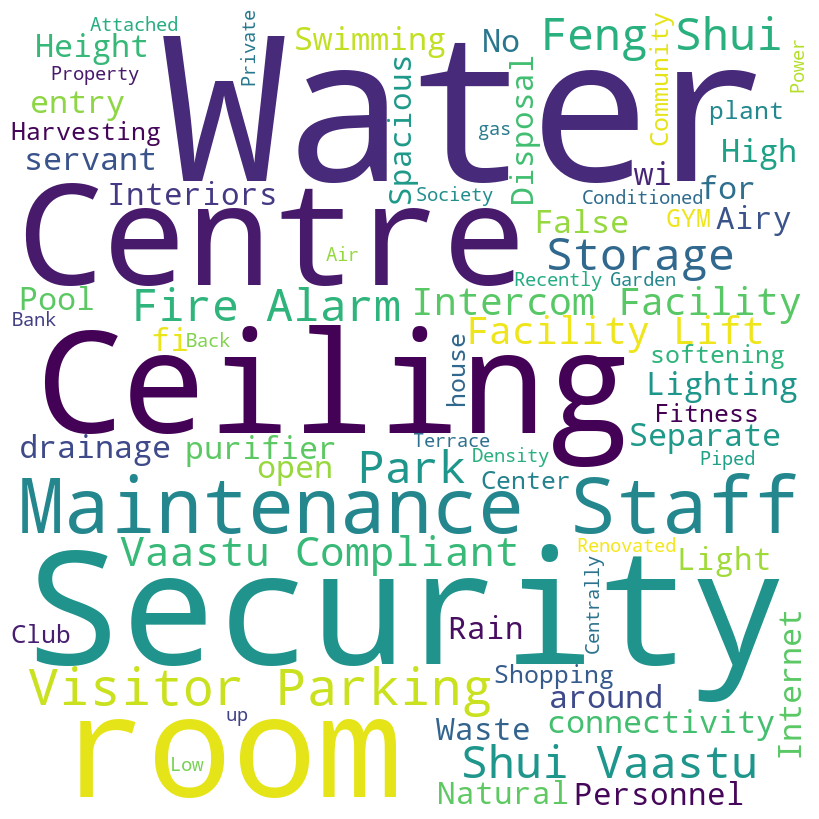

In [20]:
# FUNCTION TO GENERATE SECTOR WISE WORDCLOUD
from wordcloud import WordCloud

def generate_wordcloud(sector, wordcloud_df):
    # Extracting features for the selected sector
    features = wordcloud_df[wordcloud_df['sector'] == sector]['features']
    main = []
    for feature_list in features.dropna():
        main.extend(ast.literal_eval(feature_list))
    text = ' '.join(main) #converting list into string as wordcloud only works with strings

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=set(['s']),  # Add any stopwords here
                          min_font_size=10).generate(text)

    # Display wordcloud using matplotlib
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()  
    
    
test_sector = 'sector 1'  # Replace with the sector you want to test
generate_wordcloud(test_sector, wordcloud_df)       

SCATTERPLOT BETWEEN PRICE AND AREA

In [21]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area vs Price")
fig.show()

PIE CHART FOR SECTOR WISE BHK

In [22]:
def bedrooms(sector):
    fig = px.pie(df[df["sector"] == sector], values="bedRoom", title='Distribution of Bedrooms')
# Show plot
    fig.show()  
    
bedrooms("sector 28")

BHK PRICE RANGE BOXPLOT

<Axes: xlabel='bedRoom', ylabel='price'>

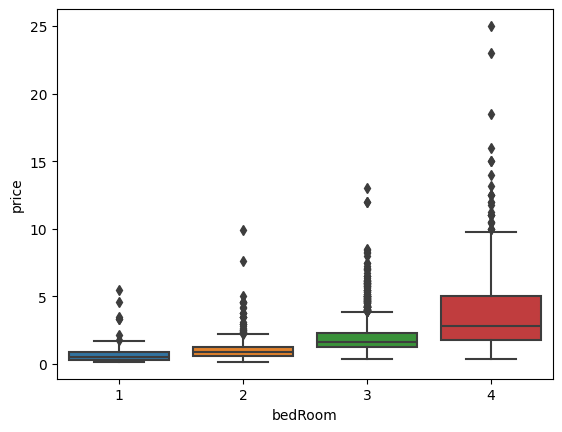

In [25]:
tempdf = new_df[new_df["bedRoom"] <=4]
sns.boxplot(tempdf, x="bedRoom", y="price")

DISTRIBUTION OF PRICE OF FLAT AND HOUSE

In [35]:
def dist(property_type):
    if property_type == "flat":
        fig = px.histogram(new_df[new_df["property_type"] == "flat"], x="price", color_discrete_sequence=['green'])
    else:
        fig = px.histogram(new_df[new_df["property_type"] == "house"], x="price")
    return fig


dist("flat")